<a href="https://colab.research.google.com/github/VidarSnjor/LV/blob/main/Lokaverkefni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 6.9 MB/s 
     |████████████████████████████████| 63 kB 973 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
pip install pytrends

  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=b93b833647517b10307a24b35a5f7989540fff07550cafdc1ccb75b38bccd190
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends


In [3]:
import math # Mathematical functions 
import numpy as np # Fundamental package for scientific computing with Python
import pandas as pd # Additional functions for analysing and manipulating data
from datetime import date, timedelta, datetime # Date Functions
from pandas.plotting import register_matplotlib_converters # This function adds plotting functions for calender dates
import matplotlib.pyplot as plt # Important package for visualization - we use this to plot the market data
import matplotlib.dates as mdates # Formatting dates
from sklearn.metrics import mean_absolute_error, mean_squared_error # Packages for measuring model performance / errors
from keras.models import Sequential # Deep learning library, used for neural networks
from keras.layers import LSTM, Dense, Dropout, Bidirectional # Deep learning classes for recurrent and regular densely-connected layers
from keras.callbacks import EarlyStopping # EarlyStopping during model training
from sklearn.preprocessing import RobustScaler, MinMaxScaler # This Scaler removes the median and scales the data according to the quantile range to normalize the price data 
import seaborn as sns
import csv
import os

In [4]:
import yfinance as yf
yf.pdr_override()

In [5]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)

In [6]:
kw_list = ["Gamestop"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')

In [7]:
data_google = pytrends.interest_over_time()

In [8]:
data_google.index = pd.DatetimeIndex(data_google.index) + pd.DateOffset(1)
data_google

,Gamestop,isPartial
date,,
2017-04-24,10,False
2017-05-01,9,False
2017-05-08,8,False
2017-05-15,9,False
2017-05-22,8,False
...,...,...
2022-03-21,6,False
2022-03-28,6,False
2022-04-04,6,False


In [9]:
df = yf.download('GME', period='5y', interval = "1wk")
df = df.join(data_google['Gamestop'])
df.dropna(inplace=True)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Gamestop
Date,,,,,,,
2017-04-24,23.400000,23.980000,22.469999,22.690001,18.737083,12444300.0,10.0
2017-05-01,22.770000,24.139999,22.559999,24.000000,19.818859,10294900.0,9.0
2017-05-08,24.000000,25.309999,23.780001,24.030001,19.843632,11443000.0,8.0
2017-05-15,24.139999,24.680000,23.520000,24.219999,20.000532,10799600.0,9.0
2017-05-22,24.350000,24.600000,21.250000,22.219999,18.348961,32489300.0,8.0
...,...,...,...,...,...,...,...
2022-03-21,90.000000,158.160004,89.760002,151.949997,151.949997,66054200.0,6.0
2022-03-28,151.979996,199.410004,151.539993,165.000000,165.000000,67901300.0,6.0
2022-04-04,166.979996,173.240005,141.570007,146.190002,146.190002,19062100.0,6.0


In [10]:
df.index = pd.to_datetime(df.index)
df

,Open,High,Low,Close,Adj Close,Volume,Gamestop
Date,,,,,,,
2017-04-24,23.400000,23.980000,22.469999,22.690001,18.737083,12444300.0,10.0
2017-05-01,22.770000,24.139999,22.559999,24.000000,19.818859,10294900.0,9.0
2017-05-08,24.000000,25.309999,23.780001,24.030001,19.843632,11443000.0,8.0
2017-05-15,24.139999,24.680000,23.520000,24.219999,20.000532,10799600.0,9.0
2017-05-22,24.350000,24.600000,21.250000,22.219999,18.348961,32489300.0,8.0
...,...,...,...,...,...,...,...
2022-03-21,90.000000,158.160004,89.760002,151.949997,151.949997,66054200.0,6.0
2022-03-28,151.979996,199.410004,151.539993,165.000000,165.000000,67901300.0,6.0
2022-04-04,166.979996,173.240005,141.570007,146.190002,146.190002,19062100.0,6.0


In [11]:
data_ext = df.copy()
data_ext['Prediction'] = data_ext['Close']
data_ext.tail()

,Open,High,Low,Close,Adj Close,Volume,Gamestop,Prediction
Date,,,,,,,,
2022-03-21,90.000000,158.160004,89.760002,151.949997,151.949997,66054200.0,6.0,151.949997
2022-03-28,151.979996,199.410004,151.539993,165.000000,165.000000,67901300.0,6.0,165.000000
2022-04-04,166.979996,173.240005,141.570007,146.190002,146.190002,19062100.0,6.0,146.190002
2022-04-11,143.039993,156.500000,140.610001,150.770004,150.770004,8958600.0,5.0,150.770004
2022-04-18,150.000000,151.240005,137.240005,141.460007,141.460007,2462800.0,0.0,141.460007


In [12]:
nrows = df.shape[0]
np_data_unscaled = np.array(df)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
np_data_unscaled.shape

(261, 7)

In [13]:
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)
# Creating a separate scaler that works on a single column for scaling predictions
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(data_ext['Close'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)

In [54]:
# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 1

# Prediction Index
index_Close = df.columns.get_loc("Close")

# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data 
train_data_len = math.ceil(np_data_scaled.shape[0] * 0.8)

# Create the training and test data
train_data = np_data_scaled[0:train_data_len, :]
test_data = np_data_scaled[train_data_len - sequence_length:, :]

# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 6 features
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation,  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(x_train[1][sequence_length-1][index_Close])
print(y_train[0])

(208, 1, 7) (208,)
(52, 1, 7) (52,)
0.06579764135489212
0.06579764135489212


In [70]:
# Configure the neural network model
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
#n_neurons = x_train.shape[1] * x_train.shape[2]
#print(n_neurons, x_train.shape[1], x_train.shape[2])
model.add(Bidirectional(LSTM(50, return_sequences=True)))
model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(50, return_sequences=False)))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

In [71]:
# Training the model
epochs = 30
batch_size = 6
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/30
35/35 [==============================] - 11s 64ms/step - loss: 0.0130 - val_loss: 0.1028
Epoch 2/30
35/35 [==============================] - 0s 7ms/step - loss: 0.0092 - val_loss: 0.0462
Epoch 3/30
35/35 [==============================] - 0s 7ms/step - loss: 0.0064 - val_loss: 0.0083
Epoch 4/30
35/35 [==============================] - 0s 9ms/step - loss: 0.0063 - val_loss: 0.0157
Epoch 5/30
35/35 [==============================] - 0s 9ms/step - loss: 0.0053 - val_loss: 0.0070
Epoch 6/30
35/35 [==============================] - 0s 9ms/step - loss: 0.0049 - val_loss: 0.0046
Epoch 7/30
35/35 [==============================] - 0s 9ms/step - loss: 0.0057 - val_loss: 0.0043
Epoch 8/30
35/35 [==============================] - 0s 8ms/step - loss: 0.0049 - val_loss: 0.0046
Epoch 9/30
35/35 [==============================] - 0s 7ms/step - loss: 0.0057 - val_loss: 0.0207
Epoch 10/30
35/35 [==============================] - 0s 7ms/step - loss: 0.0049 - val_loss: 0.0049
Epoch 11/30
35/35

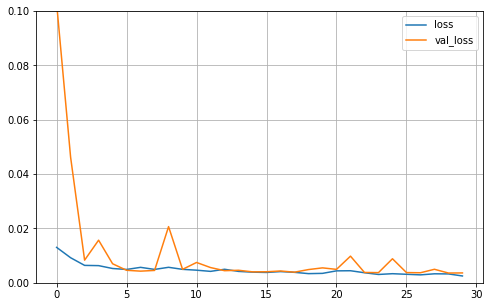

In [72]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0, 0.1)
plt.show()

In [73]:
# Get the predicted values
y_pred_scaled = model.predict(x_test)

# Unscale the predicted values
y_pred = scaler_pred.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

Median Absolute Error (MAE): 14.38
Mean Absolute Percentage Error (MAPE): 8.75 %
Median Absolute Percentage Error (MDAPE): 7.61 %


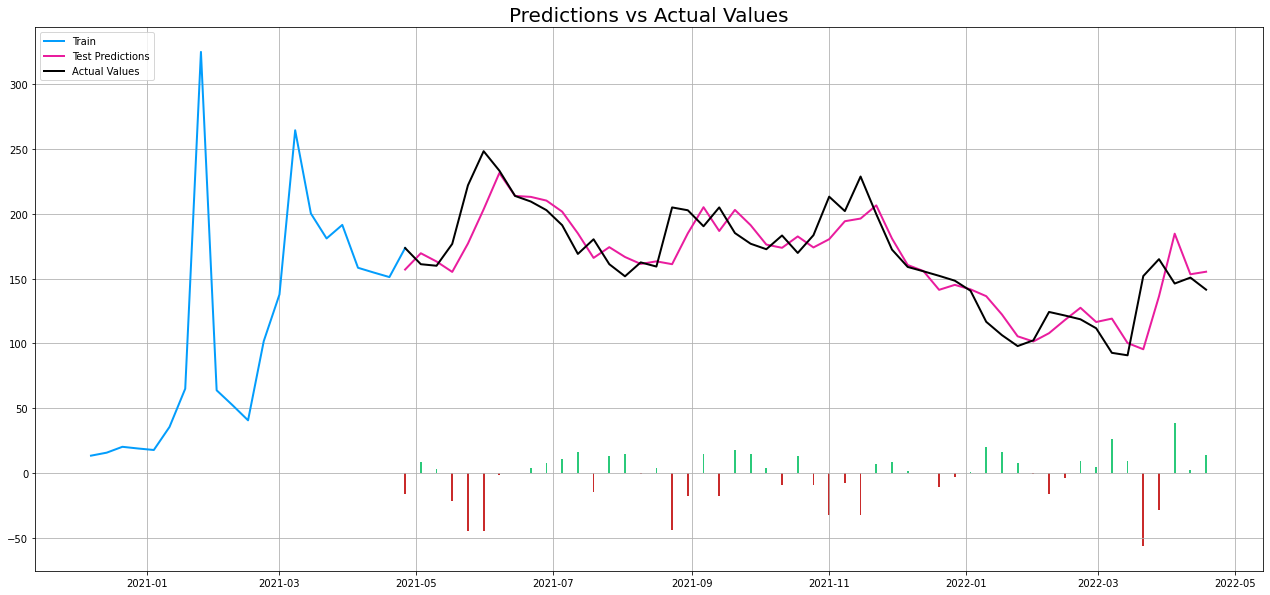

In [74]:
# The date from which on the date is displayed
display_start_date = pd.Timestamp('today') - timedelta(days=500)

# Add the date column
data_sub = df.copy()
data_sub.index = df.index

# Add the difference between the valid and predicted prices
train = df[:train_data_len + 1]
valid = df[train_data_len:]
valid.insert(1, "Prediction", y_pred.ravel(), True)
valid.insert(1, "Difference", valid["Prediction"] - valid["Close"], True)

# Zoom in to a closer timeframe
valid = valid[valid.index > display_start_date]
train = train[train.index > display_start_date]

# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 10), sharex=True)
xt = train.index; yt = train[["Close"]]
xv = valid.index; yv = valid[["Close", "Prediction"]]
plt.title("Predictions vs Actual Values", fontsize=20)
#plt.ylabel(stockname, fontsize=18)
plt.plot(xt, yt, color="#039dfc", linewidth=2.0)
plt.plot(xv, yv["Prediction"], color="#E91D9E", linewidth=2.0)
plt.plot(xv, yv["Close"], color="black", linewidth=2.0)
plt.legend(["Train", "Test Predictions", "Actual Values"], loc="upper left")

# # Create the bar plot with the differences
x = valid.index
y = valid["Difference"]

# Create custom color range for positive and negative differences
valid.loc[y >= 0, 'diff_color'] = "#2BC97A"
valid.loc[y < 0, 'diff_color'] = "#C92B2B"

plt.bar(x, y, width=0.8, color=valid['diff_color'])
plt.grid()
plt.show()

In [75]:
yv

,Close,Prediction
Date,,
2021-04-26,173.589996,156.985519
2021-05-03,161.110001,169.568146
2021-05-10,159.919998,163.202698
2021-05-17,176.789993,155.168167
2021-05-24,222.000000,177.038788
2021-05-31,248.360001,203.461639
2021-06-07,233.339996,231.497467
2021-06-14,213.820007,213.825394
2021-06-21,209.509995,213.090851


In [76]:
new_df = df[-sequence_length:]

N = sequence_length

# Get the last N day closing price values and scale the data to be values between 0 and 1
last_N_days = new_df[-sequence_length:].values
last_N_days_scaled = scaler.transform(last_N_days)

# Create an empty list and Append past N days
X_test_new = []
X_test_new.append(last_N_days_scaled)

# Convert the X_test data set to a numpy array and reshape the data
pred_price_scaled = model.predict(np.array(X_test_new))
pred_price_unscaled = scaler_pred.inverse_transform(pred_price_scaled.reshape(-1, 1))

# Print last price and predicted price for the next day
price_today = np.round(new_df['Close'][-1], 2)
predicted_price = np.round(pred_price_unscaled.ravel()[0], 2)
change_percent = np.round(100 - (price_today * 100)/predicted_price, 2)
today = date.today()

plus = '+'; minus = ''
print(f'The close price for GME at {today} was {price_today}')
print(f'The predicted close price is {predicted_price} ({plus if change_percent > 0 else minus}{change_percent}%)')

The close price for GME at 2022-04-19 was 141.46
The predicted close price is 154.86000061035156 (+8.65%)


In [77]:
todays_date = date.today()
index_framtid = pd.date_range(todays_date, periods=10, freq='W')
 
columns_framtid = df.columns
 
df_framtid = pd.DataFrame(index=index_framtid, columns=columns_framtid)
df_framtid = df_framtid.fillna(0)
df_framtid = df.append(df_framtid)
df_framtid

,Open,High,Low,Close,Adj Close,Volume,Gamestop
2017-04-24,23.400000,23.980000,22.469999,22.690001,18.737083,12444300.0,10.0
2017-05-01,22.770000,24.139999,22.559999,24.000000,19.818859,10294900.0,9.0
2017-05-08,24.000000,25.309999,23.780001,24.030001,19.843632,11443000.0,8.0
2017-05-15,24.139999,24.680000,23.520000,24.219999,20.000532,10799600.0,9.0
2017-05-22,24.350000,24.600000,21.250000,22.219999,18.348961,32489300.0,8.0
...,...,...,...,...,...,...,...
2022-05-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2022-06-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2022-06-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2022-06-19,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
